# Estudo de Caso: Detectando Câncer de Mama

## Por: Msc. Eng. Lucas Travi

## Curso: Machine Learning para Data Science - UFSM

## DESCRIÇÃO DO PROBLEMA
- Detectar se um tumor mamário é beligno ou maligno usando um classificador de suporte vetorial (SVC) através de um dataset com os seguintes atributos (inputs):
    - raio;
    - textura;
    - perímetro;
    - área;
    - concavidade;
    - suavidade;
    - compacidade;
    - pontos côncavos;
    - simetria;
    - dimensão fractal;
- Quantidade de observáveis: 569;
- Possibilidades (classes) de classificação (outputs):
    - Maligno;
    - Beligno;
- Distribuição entre as classes:
    - 212 malignos;
    - 357 belignos;

- Este dataset está disponível em: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [9]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [14]:
# Importar o dataset da biblioteca sklearn
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [46]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

Os dados vêm organizados em um dicionário, sabendo as keys desses dicionários podemos extrair as listas e transformá-las em um DataFrame utilizando a biblioteca Pandas

In [15]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [16]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [17]:
print(cancer['target_names'])

['malignant' 'benign']


In [18]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [19]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

Mais sobre np.c_: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.c_.html
Mais sobre append: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.append.html

In [32]:
print("Quantidade de dados observáveis(linhas): ",df_cancer.shape[0])
print("Quantidade de variáveis(colunas): ",df_cancer.shape[1])

Quantidade de dados observáveis(linhas):  569
Quantidade de variáveis(colunas):  31


In [33]:
display(df_cancer.head(n=100))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,0.0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,0.0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,0.0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,0.0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,0.0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440,0.0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.25760,0.37840,0.19320,0.3063,0.08368,0.0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.36820,0.26780,0.15560,0.3196,0.11510,0.0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.54010,0.53900,0.20600,0.4378,0.10720,0.0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.05800,1.10500,0.22100,0.4366,0.20750,0.0


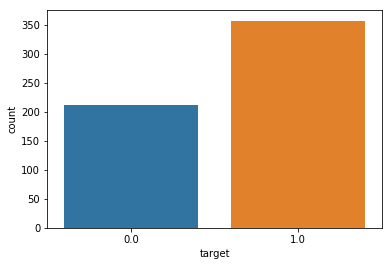

In [37]:
# Definir quem são as variáveis 0 e 1
sns.countplot(df_cancer['target'])

## VISUALIZANDO DADOS

C:\Users\Travi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


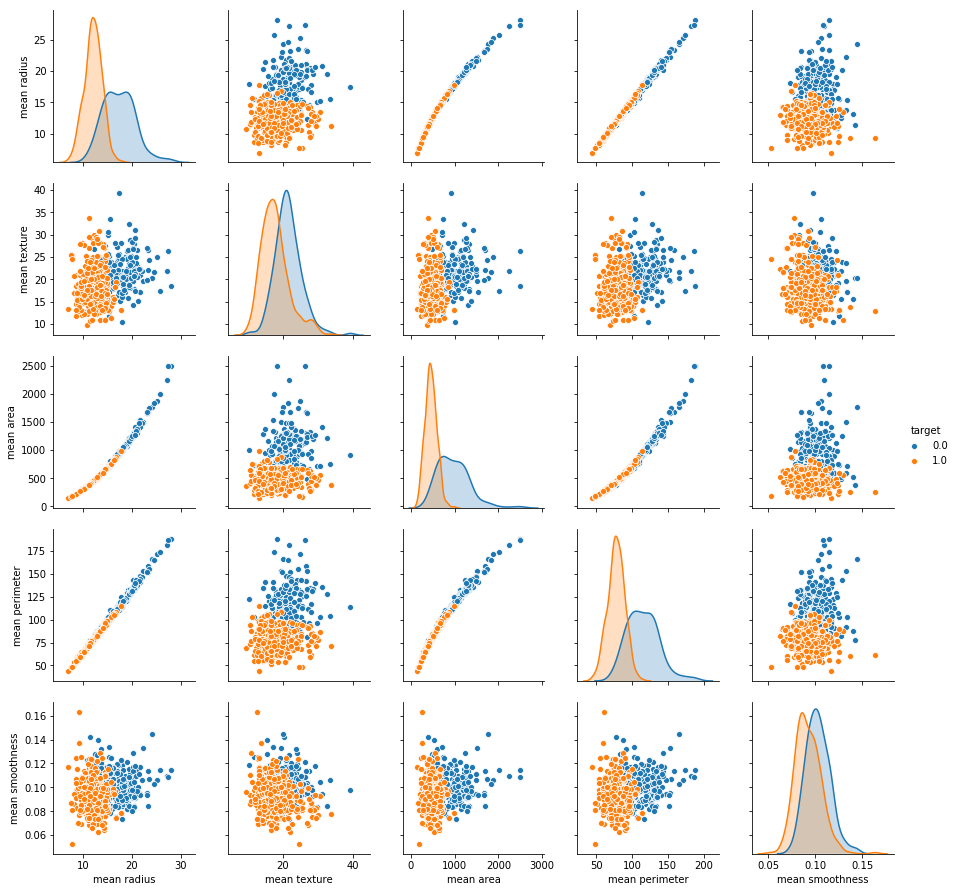

In [35]:
sns.pairplot(df_cancer,  hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

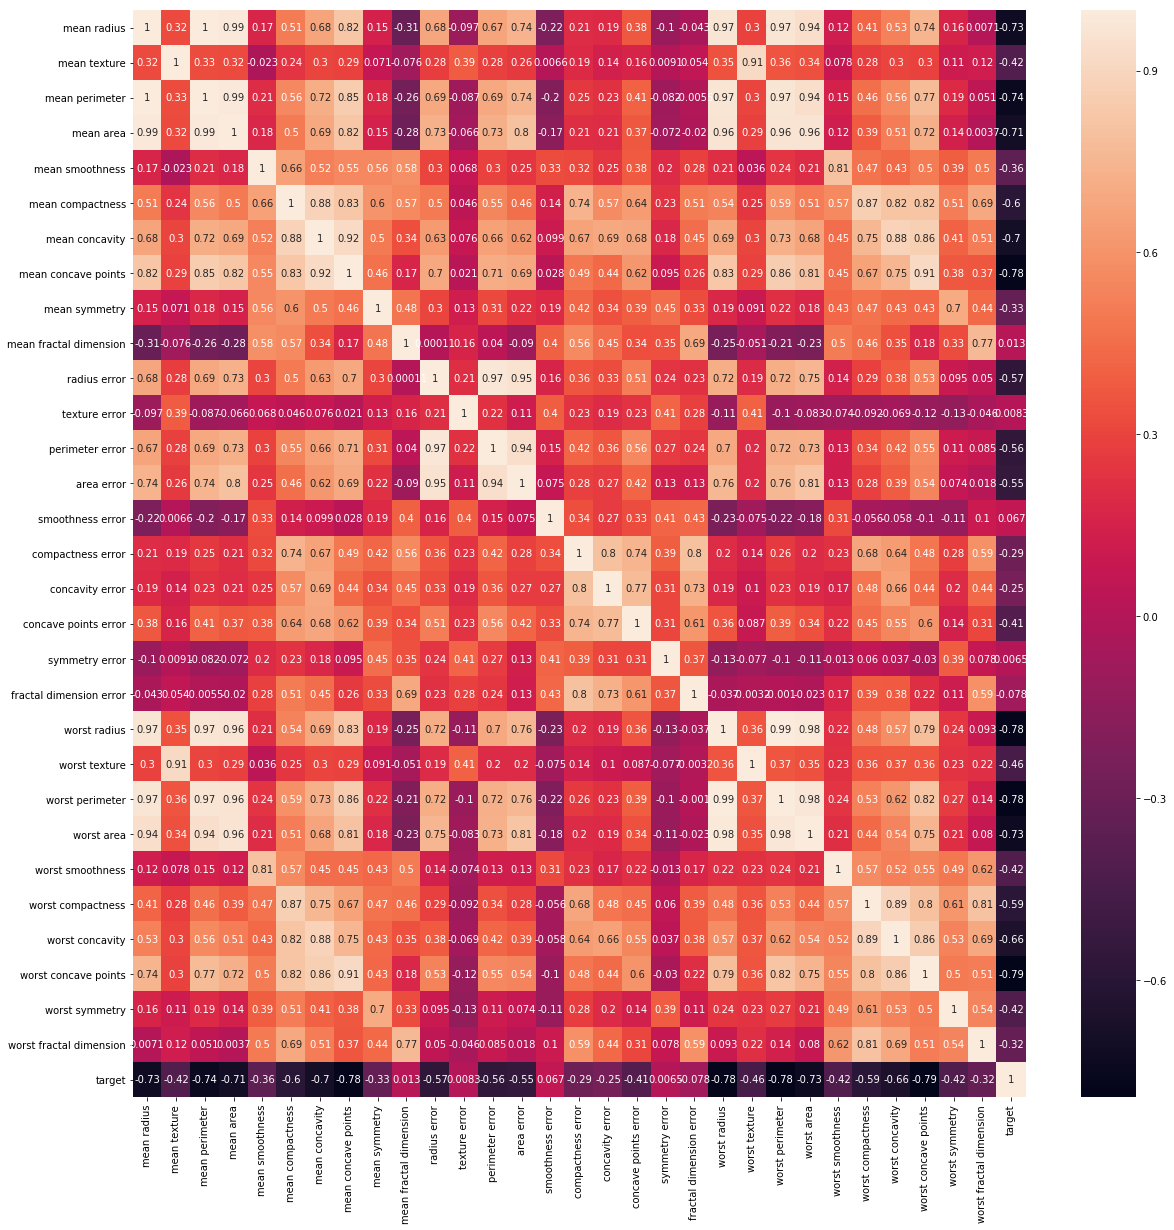

In [48]:
# Correlação entre as variáveis
plt.figure(figsize=(20,20))
sns.heatmap(df_cancer.corr(), annot=True)

Através dos gráficos acima é possível ver que as variáveis independentes relacionadas com a geometria do tumor possuem uma elevada correlação umas com as outras, enquanto parâmetros como a textura e a suavidade apresentam correlações menores.

## TREINANDO E AVALIANDO O MODELO

In [51]:
# Primeiro vamos definir uma matrix com todas as variáveis independentes (X)
# Para isto basta selecionar toda o DataFrame cancer_df e retirar a última coluna
X = df_cancer.drop(['target'], axis=1)

Mais sobre a função drop: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

In [53]:
display(X.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
# Criar um vetor com as classes através das variáveis dependentes (y)
y = df_cancer['target']
display(y)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     1.0
20     1.0
21     1.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
539    1.0
540    1.0
541    1.0
542    1.0
543    1.0
544    1.0
545    1.0
546    1.0
547    1.0
548    1.0
549    1.0
550    1.0
551    1.0
552    1.0
553    1.0
554    1.0
555    1.0
556    1.0
557    1.0
558    1.0
559    1.0
560    1.0
561    1.0
562    0.0
563    0.0
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

Como já sabemos: 0 corresponde a tumores malignos e 1 corresponde a tumores benignos

In [56]:
# Dividir X e y entre treinamento e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [59]:
print("Quantidade de observáveis enviadas para treino:",X_train.shape[0])
print("Quantidade de observáveis enviadas para teste:",X_test.shape[0])

Quantidade de observáveis enviadas para treino: 455
Quantidade de observáveis enviadas para teste: 114


In [69]:
display(X_train.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


In [60]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 0, 47],
       [ 0, 67]], dtype=int64)

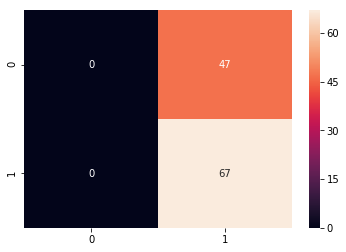

In [62]:
sns.heatmap(cm, annot=True)

De acordo com a matriz de confusão, o modelo não conseguiu prever corretamente nenhum tumor maligno, enquanto preveu corretamente 67 tumores malignos. O fato de o modelo não conseguir prever corretamente tumores malignos é o mais preocupantes entre os tipos de erro, conclue-se assim que nosso modelo precisa ser otimizado urgentemente.

Mais informações sobre matriz de confusão: https://en.wikipedia.org/wiki/Confusion_matrix

## OTIMIZANDO O MODELO

In [118]:
# Importar a classe MinMaxScaler para padronizar os dados de treino
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
# Transformar X_train_scaled em um DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns = cancer['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns = cancer['feature_names'])

display(X_train_scaled.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-1.150365,-0.390642,-1.128550,-0.958764,0.310984,-0.595995,-0.802596,-0.802490,0.294539,0.094251,...,-1.043176,0.213533,-1.036045,-0.848808,0.342499,-0.730097,-0.812321,-0.757984,-0.016148,-0.385034
1,-0.937990,0.680514,-0.948201,-0.821525,-0.609636,-0.909867,-0.660669,-0.898716,0.754935,-0.425471,...,-0.715654,1.066842,-0.689922,-0.668697,-0.095537,-0.537866,-0.375048,-0.606870,0.096690,-0.386158
2,0.574121,-1.033336,0.513941,0.408586,-0.106161,-0.363019,-0.417990,-0.088446,-0.271820,-0.575221,...,0.297615,-0.977818,0.262137,0.113888,-0.524724,-0.520866,-0.182989,-0.023719,-0.200502,-0.751443
3,-0.547220,-0.316022,-0.577622,-0.566615,0.586662,-0.649331,-0.805298,-0.500065,0.331078,0.540567,...,-0.701325,-0.757927,-0.735737,-0.658966,-0.816748,-1.034921,-1.091633,-0.852545,-1.076186,-0.546883
4,-0.527398,0.791240,-0.561563,-0.523571,-1.051446,-1.017532,-0.905149,-0.935806,-0.969721,-0.426939,...,-0.427026,1.058637,-0.422423,-0.440955,-0.303494,-0.467251,-0.724565,-0.783118,0.311240,-0.082129


Mais sobre StandardScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

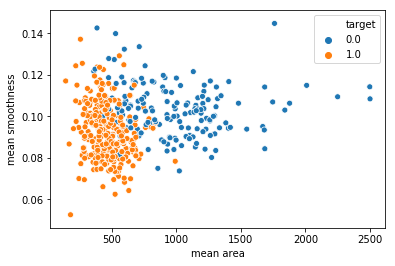

In [134]:
sns.scatterplot(x = X_train['mean area'], y = X_train['mean smoothness'], hue = y_train)

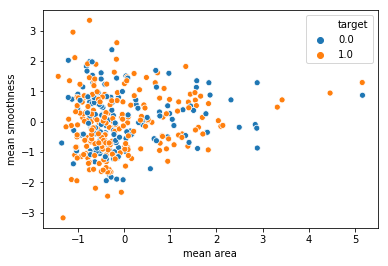

In [133]:
sns.scatterplot(x = X_train_scaled['mean area'], y = X_train_scaled['mean smoothness'], hue = y_train)

In [121]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

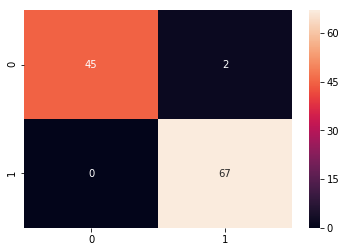

In [122]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

Apenas com o ajuste de padronização das variáveis independentes conseguimos melhorar muito a precisão do nosso modelo. Agora temos um total de 112 acertos e apenas 7 erros, e nenhum tumor maligno foi classificado como sendo benigno, o que era nosso principal objetivo.

In [123]:
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

        0.0       1.00      0.96      0.98        47
        1.0       0.97      1.00      0.99        67

avg / total       0.98      0.98      0.98       114



In [124]:
# Definir um dicionário com os parâmetros a serem testados
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [128]:
# Importar GridSearch e realizar a busca dos melhores parâmetros com os dados padronizados
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV]  C=0.01, gamma=10, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV]  C=0.01, gamma=10, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV]  C=0.01, gamma=10, kernel=rbf, score=0.6357615894039735, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.6357615894039735, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf .........................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=10, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV]  C=0.1, gamma=10, kernel=rbf, score=0.6357615894039735, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6357615894039735, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9013157894736842, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ................

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [129]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

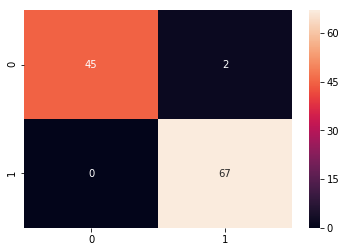

In [130]:
# Fazer as previsões usando os parâmetros ótimos
grid_predictions = grid.predict(X_test_scaled)
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)

In [131]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

        0.0       1.00      0.96      0.98        47
        1.0       0.97      1.00      0.99        67

avg / total       0.98      0.98      0.98       114



## Conclusão

A otimização dos parâmetros do classificador de suporte vetorial (SVC) não foi suficiente para que obtivéssemos uma maior precisão. Todavia, a precisão obtida de 98% e o fato de nenhum tumor maligno ser classificado erroneamente tornam o modelo obtido mais do que satisfatório.